In [2]:
from scipy.stats import uniform, norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Ruido y residuos
Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1.

a) Sean 𝑋 ∼ U (0,1) y 𝑌 := 𝑓(𝑋).

Fijemos 𝑛 = 100. 
Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y aplicar la función 𝑓 a cada muestra para calcular 𝑦𝑖 = 𝑓(𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛. 
Realizar un ajuste lineal de la forma 𝑌 = 𝛽0 + 𝑋𝛽1 + 𝜖 a partir de los samples (𝑥1, 𝑦1), ... , (𝑥𝑛, 𝑦𝑛) generados 
y calcular, para cada 𝑖 ∈ {1, . . . , 𝑛}, 𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖ˆ𝛽1 + ˆ𝛽0).

Describir la distribución empírica dada por los residuos {𝜀1, . . . , 𝜀𝑛}

In [ ]:
# Crear estimadores del Modelo de Regresión Lineal Simple
def simple_linear_regression(x, y):
    """
    Estima un modelo de regresión lineal simple (MRLS) utilizando mínimos cuadrados ordinarios.

    Parámetros:
    - x: array de valores independientes.
    - y: array de valores dependientes.

    Devuelve:
    - beta_0: intercepto estimado.
    - beta_1: pendiente estimada.
    """
    # Calcular las medias de x e y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcular el numerador y denominador para beta_1 (pendiente)
    numerador = np.sum((x - x_mean) * (y - y_mean))
    denominador = np.sum((x - x_mean)**2)

    # Estimación de beta_1 (pendiente)
    beta_1 = numerador / denominador

    # Estimación de beta_0 (intercepto)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

In [3]:
# Fijar parámetros
n = 100

# Generar muestras x ~ U(0,1)
x = np.random.uniform(0, 1, n)

# Aplicar f(x) = 2x - 1
y = 2 * x - 1   # b_1 = 2, b_0 = -1

# Ajuste de regresión lineal (y = beta0 + beta1 * x)
X = np.stack((np.ones(n),x)).T
print('X:',X)

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y # (X'X)^(-1) X'y
print('betahat:',beta_hat)

# Predicciones - y_hat = b_0 + b_1 * x
y_hat = X @ beta_hat

# Cálculo de residuos
residuals = y - y_hat

'''
# Generar Variables Aleatorias
X = uniform.rvs(size=n)
epsilon = norm.rvs(loc=0, scale=sigma, size=n)

Y = f(X) + epsilon

# Estimar el MRLS
beta_0, beta_1 = simple_linear_regression(X, Y)

# Imprimir los estimadores
print("Estimador de beta_0:", beta_0)
print("Estimador de beta_1:", beta_1)
'''



X: [[1.         0.32561984]
 [1.         0.32370927]
 [1.         0.63448515]
 [1.         0.76010391]
 [1.         0.05307121]
 [1.         0.53604233]
 [1.         0.61655799]
 [1.         0.82394932]
 [1.         0.22614664]
 [1.         0.64014881]
 [1.         0.38226328]
 [1.         0.21531696]
 [1.         0.83618235]
 [1.         0.90970411]
 [1.         0.63404371]
 [1.         0.77297035]
 [1.         0.70630441]
 [1.         0.85531851]
 [1.         0.53700725]
 [1.         0.58564912]
 [1.         0.18624891]
 [1.         0.47253416]
 [1.         0.84252008]
 [1.         0.58286062]
 [1.         0.70611655]
 [1.         0.26307779]
 [1.         0.43870305]
 [1.         0.41697435]
 [1.         0.8120052 ]
 [1.         0.92263198]
 [1.         0.41343625]
 [1.         0.83824376]
 [1.         0.29206797]
 [1.         0.73404602]
 [1.         0.50178505]
 [1.         0.16734938]
 [1.         0.33222406]
 [1.         0.0845108 ]
 [1.         0.67103764]
 [1.         0.9294899

'\n# Generar Variables Aleatorias\nX = uniform.rvs(size=n)\nepsilon = norm.rvs(loc=0, scale=sigma, size=n)\n\nY = f(X) + epsilon\n\n# Estimar el MRLS\nbeta_0, beta_1 = simple_linear_regression(X, Y)\n\n# Imprimir los estimadores\nprint("Estimador de beta_0:", beta_0)\nprint("Estimador de beta_1:", beta_1)\n'

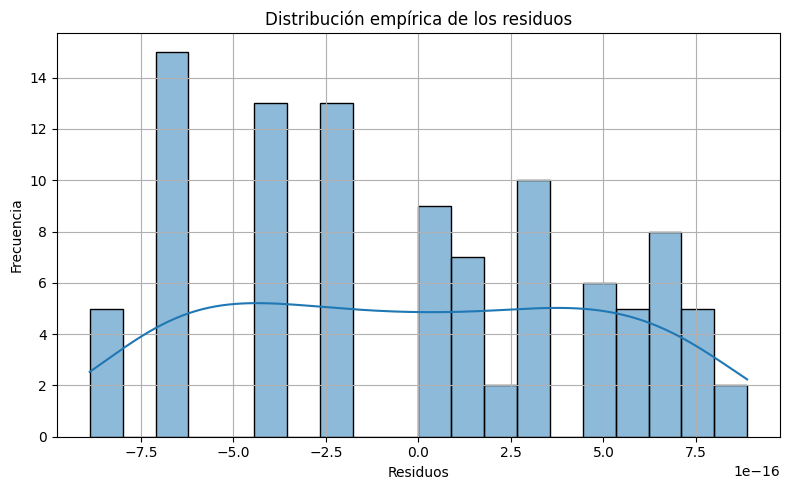

In [7]:
# Graficar histograma de los residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Distribución empírica de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# encontremos la recta que une los tres puntos del ejercicio en clase:
x = np.array([0,1,2])
y = np.array([0,1,0]).T
X = np.stack((np.ones(3),x)).T
print('X:',X)

betahat = np.linalg.inv(X.T @ X) @ X.T @ y
print('betahat:',betahat)

